# Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 


In [2]:
df = pd.read_csv(r"C:\Users\Addmin\Desktop\Internships\Tamizhan Skills\loan-train.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
print("Shape:", df.shape)

Shape: (614, 13)


In [7]:
print("Columns:\n", df.columns)

Columns:
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [8]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [9]:
print("Data types:\n", df.dtypes)

Data types:
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


# Handling Categorical Variables

In [10]:
if 'Loan_ID' in df.columns:
    df.drop('Loan_ID', axis=1, inplace=True)


In [11]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace = True)
    else:
        df[col].fillna(df[col].median(), inplace = True)

C:\Users\Addmin\AppData\Local\Temp\ipykernel_20036\3184030369.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace = True)
C:\Users\Addmin\AppData\Local\Temp\ipykernel_20036\3184030369.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

# Encoding Categorical Variables

In [12]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']
multi_cat_cols = [col for col in df.columns if df[col].dtype == 'object' and col not in binary_cols]

# Label Encoding

In [13]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [14]:
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [15]:
df = pd.get_dummies(df, columns = multi_cat_cols) # One hot encoding

# Feature and Target Separation

In [16]:
x = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

# Feature Scaling

In [17]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

In [19]:
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (491, 16)
y_train shape: (491,)


# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.7886178861788617

In [22]:
log_preds = lr.predict(x_test)
log_proba = lr.predict_proba(x_test)[:, 1]

# Evaluation

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

In [24]:
print("🔸 Logistic Regression Results:")
print("Accuracy: ", accuracy_score(y_test, log_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_preds))
print("Classification Report:\n", classification_report(y_test, log_preds))

🔸 Logistic Regression Results:
Accuracy:  0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



# ROC Curve for Logistic Regression

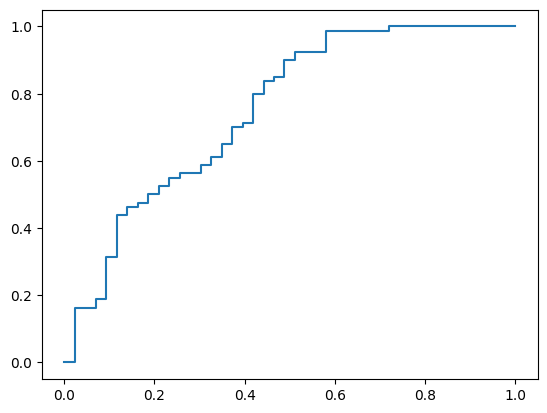

In [25]:
fpr, tpr, _ = roc_curve(y_test, log_proba)
plt.plot(fpr, tpr, label = "Logistic ROC (AUC = {:.2f})".format(auc(fpr, tpr)))

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
rf_preds = rf_model.predict(x_test)
rf_proba = rf_model.predict_proba(x_test)[:, 1]

# Evaluation

In [30]:
print("\n🔸 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))


🔸 Random Forest Results:
Accuracy: 0.7723577235772358
Confusion Matrix:
 [[19 24]
 [ 4 76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.44      0.58        43
           1       0.76      0.95      0.84        80

    accuracy                           0.77       123
   macro avg       0.79      0.70      0.71       123
weighted avg       0.78      0.77      0.75       123



# ROC Curve for Random Forest Classifier

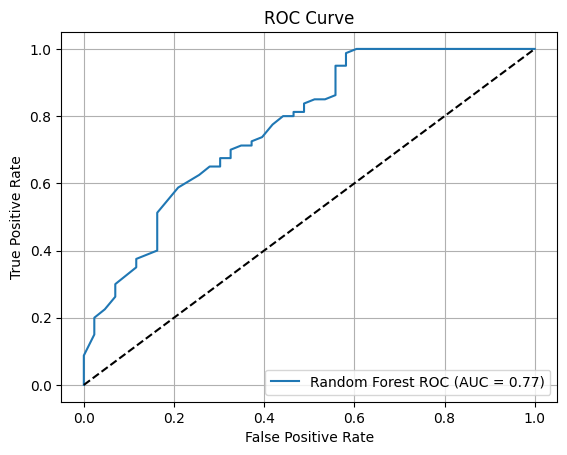

In [33]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
plt.plot(fpr_rf, tpr_rf, label="Random Forest ROC (AUC = {:.2f})".format(auc(fpr_rf, tpr_rf)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [34]:
eligibility_result = pd.DataFrame({
    "Prediction(Logistic)": ["Eligible" if p == 1 else "Not Eligible" for p in log_preds],
    "Prediction(RF)": ["Eligible" if p == 1 else "Not Eligible" for p in rf_preds]
})

print("\n🔍 Sample Predictions:")
print(eligibility_result.head())


🔍 Sample Predictions:
  Prediction(Logistic) Prediction(RF)
0             Eligible       Eligible
1             Eligible       Eligible
2             Eligible       Eligible
3             Eligible       Eligible
4             Eligible       Eligible


In [35]:
x.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [36]:
import joblib

# Save model and scaler (and any encoders if used)
joblib.dump(rf_model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(x.columns.tolist(), 'feature_names.pkl')  # save column names


['feature_names.pkl']